# Reproducible Data Visualization with Python (Matplotlib) in Jupyter Notebooks - Part III

Credits: This part of lecture is adapted from [Reproducible Science Curriculum - Data Exploration](https://github.com/Reproducible-Science-Curriculum/data-exploration-RR-Jupyter/blob/gh-pages/notebooks/Data_exploration.ipynb) and [Lectures on scientific computing with Python - matplotlib - 2D and 3D plotting in Python](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

# 6. More on plotting in Python with `matplotlib` ¶

Now that we've seen a few examples of how to make figures from real data, let's explore more baciss of plotting using synthetic data, and learn how to cusmomize the plots. We will generate synthetic data witth `Numpy`.

__For a clean start, let's restart the Kernel and re-import libraries__ so that variables and environment from the previous session will not affect this session.

In [1]:
# pip install matplotlib numpy

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [3]:
x = np.arange(1,10,2) # Returns a array of numbers evenly spaced within the given interval 
y = x ** 2

In [4]:
print('x =', x)
print('y=', y)

x = [1 3 5 7 9]
y= [ 1  9 25 49 81]


Although the way we made plots in the last section work well for simple explorative applications, we often use an **Object Oriented** approach ([read more here](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/)) when figures get more complicated. Basically, each figure or canvas is a `Figure` object, that may contain multiple panels; each panel is an `axes` object, which holds the actual data.  
Instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

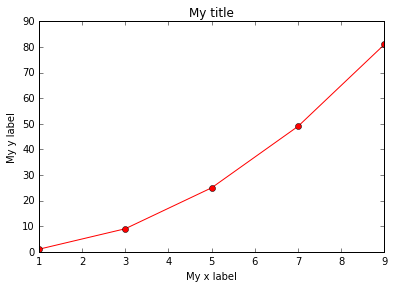

In [5]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r-o') # "r" defines the line color; "o" defines the shape of the data points
axes.set_xlabel('My x label')
axes.set_ylabel('My y label')
axes.set_title('My title')

Now we want to add one more data series `z`, and plot `z` in the same figure: 

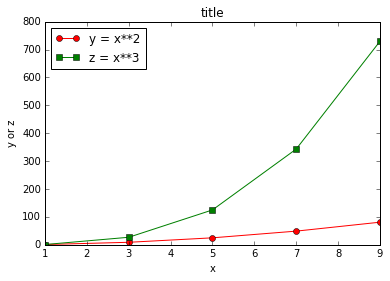

In [6]:
z = x **3

fig, ax = plt.subplots() # plots multiple data series in the same figure 

ax.plot(x, y,"r-o", label="y = x**2")
ax.plot(x, z, "g-s", label="z = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y or z')
ax.set_title('title');

#### Plot axes range
We can also control the scale and apperence of axes. The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

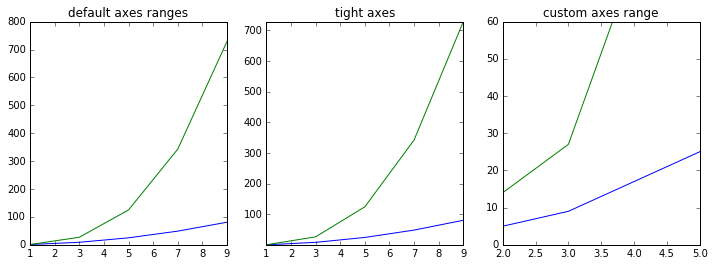

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # make side by side plots of a given size 

# plot x-y and x-z on the same plot, and set the title to "default axes ranges"
axes[0].plot(x, y, x, z)
axes[0].set_title("default axes ranges")

# get tightly fitted axes ranges 
axes[1].plot(x, y, x, z)
axes[1].axis('tight')
axes[1].set_title("tight axes")

# set x and y limits
axes[2].plot(x, y, x, z)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range")


#### Logarithmic scale
It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case). 

Let's generate another variable `u`, with the value of natural exponential of `x`.

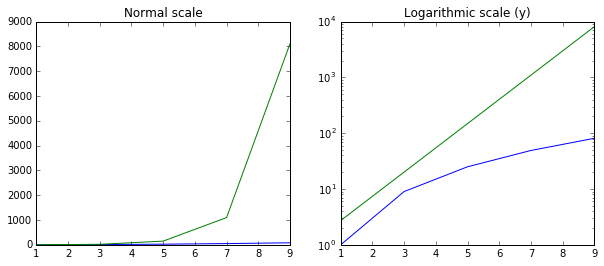

In [8]:
u = np.exp(x)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# make a plot using linear scale
axes[0].plot(x, y, x, u)
axes[0].set_title("Normal scale")

# make a plot using log scale
axes[1].plot(x, y, x, u)
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")

What if we want to use different scales for y and z in the same plot? 

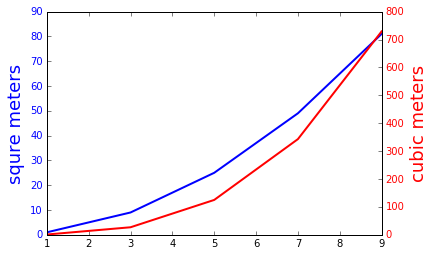

In [9]:
# first, make a plot with left axis
fig, ax1 = plt.subplots()

# add data associated with the left axis
ax1.plot(x, y, lw=2, color="blue")
ax1.set_ylabel("squre meters", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

# then, add the right axis
ax2 = ax1.twinx()

# add data associated with the right axis
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel("cubic meters", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

#### Axis grid
With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

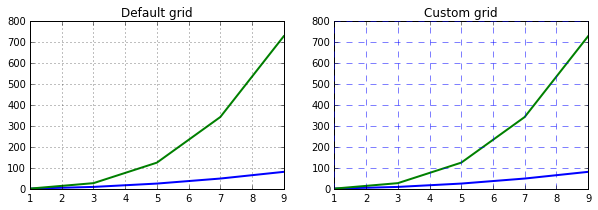

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, y, x, z, lw=2)
axes[0].grid(True)
axes[0].set_title("Default grid")

# custom grid appearance
axes[1].plot(x, y, x, z, lw=2)
axes[1].grid(color='b', linestyle='dashed', linewidth=0.5)
axes[1].set_title("Custom grid")

### Saving plots as image files  
If you'd like to save your plots as an image file, run `fig.savefig('my_figure.png')` where `"my_figure"` is the file name:

In [11]:
# save figure in the `figures` directory as "figure1.png" with desired resolution
fig.savefig("../figures/figure1.png", dpi=300)

### Other 2D plot styles
In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [12]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

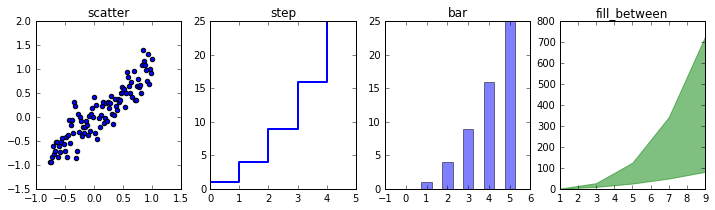

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

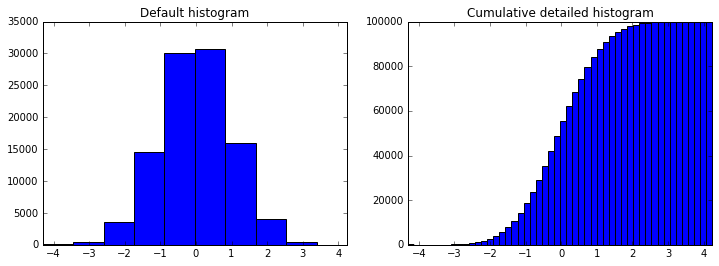

In [14]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));